In [1]:
import tensorflow as tf
import numpy as np

In [3]:
X = []
Y = []
for i in range(6):
    
    lst = list(range(i,i+4))
    
    X.append(list(map(lambda c: [c/10], lst)))
    Y.append((i+4)/10)
    
X = np.array(X)
Y = np.array(Y)
for i in range(len(X)):
    print(X[i], Y[i])

[[0. ]
 [0.1]
 [0.2]
 [0.3]] 0.4
[[0.1]
 [0.2]
 [0.3]
 [0.4]] 0.5
[[0.2]
 [0.3]
 [0.4]
 [0.5]] 0.6
[[0.3]
 [0.4]
 [0.5]
 [0.6]] 0.7
[[0.4]
 [0.5]
 [0.6]
 [0.7]] 0.8
[[0.5]
 [0.6]
 [0.7]
 [0.8]] 0.9


In [4]:
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(units = 10, return_sequences=False, input_shape=[4, 1]),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss = 'mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 10)                120       
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [5]:
model.fit(X, Y, epochs=100, verbose=0)

In [7]:
model.predict(np.array([[[0.6],[0.7],[0.8],[0.9]]]))

array([[0.90963674]], dtype=float32)

In [8]:
model.predict(np.array([[[-0.1],[0.0],[0.1],[0.2]]]))

array([[0.31127608]], dtype=float32)

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(units=10, return_sequences=True, input_shape=[4, 1]),
    tf.keras.layers.SimpleRNN(units=10, return_sequences=True, input_shape=[4, 1]),
    tf.keras.layers.SimpleRNN(units=10, return_sequences=True, input_shape=[4, 1]),
    tf.keras.layers.SimpleRNN(units=10, return_sequences=True, input_shape=[4, 1]),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 4, 10)             120       
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 4, 10)             210       
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 4, 10)             210       
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, 4, 10)             210       
                                                                 
 dense_1 (Dense)             (None, 4, 1)              11        
                                                                 
Total params: 761
Trainable params: 761
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.fit(X, Y, epochs=100, verbose=1)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 0.5184
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 0.4514
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 0.3914
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 0.3383
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2919
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 0.2522
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 0.2185
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1904
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1674
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1487
Epoch 11/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1339
Epoch 12/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1222
Epoch 13/100
1/1 [==============================] - 0s 4ms/ste

In [12]:
model.predict(np.array([[[0.6],[0.7],[0.8],[0.9]]]))

array([[[0.7861689],
        [0.685288 ],
        [0.6581758],
        [0.6712113]]], dtype=float32)

In [13]:
X = []
Y = []
for i in range(3000):
    lst = np.random.rand(100)
    idx = np.random.choice(100, 2, replace=False)
    zeros = np.zeros(100)
    zeros[idx] = 1
    X.append(np.array(list(zip(zeros, lst))))
    Y.append(np.prod(lst[idx]))
    
print(X[0], Y[0])

[[1.         0.16400731]
 [0.         0.18534689]
 [0.         0.64606615]
 [0.         0.30870086]
 [0.         0.19721497]
 [0.         0.27406386]
 [0.         0.48999061]
 [0.         0.68574493]
 [0.         0.48432931]
 [0.         0.53992658]
 [0.         0.84200322]
 [0.         0.74921589]
 [0.         0.907324  ]
 [0.         0.02581092]
 [0.         0.35124825]
 [0.         0.93394219]
 [0.         0.75732771]
 [0.         0.54587287]
 [0.         0.00595621]
 [0.         0.66813225]
 [0.         0.65602601]
 [0.         0.58636423]
 [0.         0.50356136]
 [0.         0.82838804]
 [0.         0.80720881]
 [0.         0.88143973]
 [0.         0.85565476]
 [0.         0.12932294]
 [0.         0.79725939]
 [0.         0.83936043]
 [0.         0.61006243]
 [0.         0.34106707]
 [0.         0.54007769]
 [0.         0.03953201]
 [0.         0.99011822]
 [0.         0.45502968]
 [0.         0.32637888]
 [0.         0.40669305]
 [0.         0.38644118]
 [0.         0.91716151]


In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(units=30, return_sequences=True, input_shape=[100,2]),
    tf.keras.layers.SimpleRNN(units=30),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_5 (SimpleRNN)    (None, 100, 30)           990       
                                                                 
 simple_rnn_6 (SimpleRNN)    (None, 30)                1830      
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 2,851
Trainable params: 2,851
Non-trainable params: 0
_________________________________________________________________


In [15]:
X = np.array(X)
Y = np.array(Y)

history = model.fit(X[:2560], Y[:2560], epochs = 100, validation_split=0.2)

Epoch 1/100
64/64 [==============================] - 3s 27ms/step - loss: 0.0738 - val_loss: 0.0502
Epoch 2/100
64/64 [==============================] - 1s 19ms/step - loss: 0.0515 - val_loss: 0.0491
Epoch 3/100
64/64 [==============================] - 1s 20ms/step - loss: 0.0491 - val_loss: 0.0470
Epoch 4/100
64/64 [==============================] - 1s 20ms/step - loss: 0.0494 - val_loss: 0.0549
Epoch 5/100
64/64 [==============================] - 1s 20ms/step - loss: 0.0500 - val_loss: 0.0466
Epoch 6/100
64/64 [==============================] - 1s 20ms/step - loss: 0.0491 - val_loss: 0.0475
Epoch 7/100
64/64 [==============================] - 1s 20ms/step - loss: 0.0500 - val_loss: 0.0525
Epoch 8/100
64/64 [==============================] - 1s 21ms/step - loss: 0.0511 - val_loss: 0.0475
Epoch 9/100
64/64 [==============================] - 1s 21ms/step - loss: 0.0476 - val_loss: 0.0480
Epoch 10/100
64/64 [==============================] - 1s 19ms/step - loss: 0.0487 - val_loss: 0.0462

64/64 [==============================] - 2s 27ms/step - loss: 0.0332 - val_loss: 0.0439
Epoch 83/100
64/64 [==============================] - 2s 27ms/step - loss: 0.0322 - val_loss: 0.0412
Epoch 84/100
64/64 [==============================] - 2s 27ms/step - loss: 0.0321 - val_loss: 0.0442
Epoch 85/100
64/64 [==============================] - 2s 27ms/step - loss: 0.0312 - val_loss: 0.0499
Epoch 86/100
64/64 [==============================] - 2s 28ms/step - loss: 0.0345 - val_loss: 0.0409
Epoch 87/100
64/64 [==============================] - 2s 26ms/step - loss: 0.0328 - val_loss: 0.0412
Epoch 88/100
64/64 [==============================] - 2s 28ms/step - loss: 0.0301 - val_loss: 0.0394
Epoch 89/100
64/64 [==============================] - 2s 28ms/step - loss: 0.0323 - val_loss: 0.0472
Epoch 90/100
64/64 [==============================] - 2s 28ms/step - loss: 0.0290 - val_loss: 0.0399
Epoch 91/100
64/64 [==============================] - 2s 28ms/step - loss: 0.0273 - val_loss: 0.0366
Epo

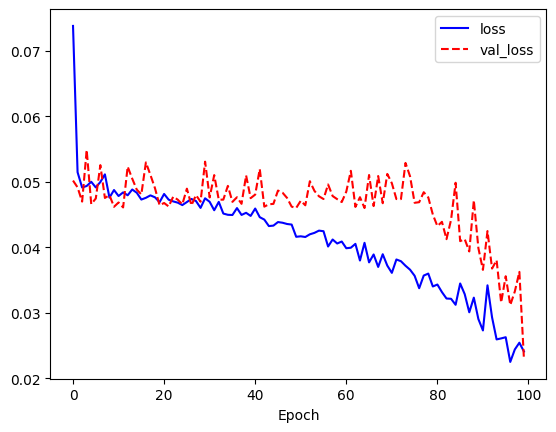

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'],'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [18]:
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(units=30, return_sequences=True, input_shape=[100,2]),
    tf.keras.layers.LSTM(units=30),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 30)           3960      
                                                                 
 lstm_1 (LSTM)               (None, 30)                7320      
                                                                 
 dense_3 (Dense)             (None, 1)                 31        
                                                                 
Total params: 11,311
Trainable params: 11,311
Non-trainable params: 0
_________________________________________________________________


In [19]:
X = np.array(X)
Y = np.array(Y)

history = model.fit(X[:2560], Y[:2560], epochs = 100, validation_split=0.2)

Epoch 1/100
64/64 [==============================] - 5s 42ms/step - loss: 0.0502 - val_loss: 0.0465
Epoch 2/100
64/64 [==============================] - 2s 33ms/step - loss: 0.0475 - val_loss: 0.0465
Epoch 3/100
64/64 [==============================] - 2s 38ms/step - loss: 0.0473 - val_loss: 0.0463
Epoch 4/100
64/64 [==============================] - 3s 47ms/step - loss: 0.0477 - val_loss: 0.0464
Epoch 5/100
64/64 [==============================] - 3s 46ms/step - loss: 0.0473 - val_loss: 0.0472
Epoch 6/100
64/64 [==============================] - 3s 46ms/step - loss: 0.0473 - val_loss: 0.0464
Epoch 7/100
64/64 [==============================] - 3s 46ms/step - loss: 0.0471 - val_loss: 0.0463
Epoch 8/100
64/64 [==============================] - 3s 47ms/step - loss: 0.0474 - val_loss: 0.0461
Epoch 9/100
64/64 [==============================] - 3s 45ms/step - loss: 0.0473 - val_loss: 0.0462
Epoch 10/100
64/64 [==============================] - 3s 46ms/step - loss: 0.0478 - val_loss: 0.0463

64/64 [==============================] - 3s 48ms/step - loss: 7.2167e-04 - val_loss: 7.4601e-04
Epoch 82/100
64/64 [==============================] - 3s 49ms/step - loss: 7.3797e-04 - val_loss: 6.4344e-04
Epoch 83/100
64/64 [==============================] - 3s 49ms/step - loss: 7.1783e-04 - val_loss: 5.1965e-04
Epoch 84/100
64/64 [==============================] - 3s 49ms/step - loss: 5.7353e-04 - val_loss: 5.6258e-04
Epoch 85/100
64/64 [==============================] - 3s 45ms/step - loss: 6.2471e-04 - val_loss: 7.4260e-04
Epoch 86/100
64/64 [==============================] - 3s 43ms/step - loss: 6.6046e-04 - val_loss: 7.7099e-04
Epoch 87/100
64/64 [==============================] - 3s 45ms/step - loss: 7.7636e-04 - val_loss: 6.2954e-04
Epoch 88/100
64/64 [==============================] - 3s 44ms/step - loss: 5.5144e-04 - val_loss: 7.4086e-04
Epoch 89/100
64/64 [==============================] - 3s 43ms/step - loss: 7.0893e-04 - val_loss: 4.2660e-04
Epoch 90/100
64/64 [============

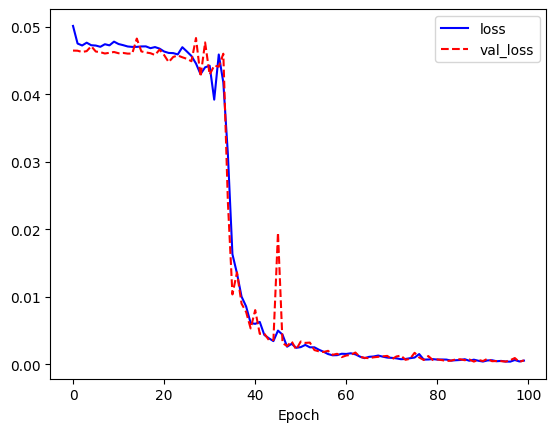

In [20]:
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'],'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

--------------------

In [24]:
path_to_train_file = 'C:/Users/kangminju/Documents/DL_ws/nsmc-master/ratings_train.txt'
path_to_test_file = 'C:/Users/kangminju/Documents/DL_ws/nsmc-master/ratings_test.txt'

In [25]:
train_text = open(path_to_train_file,'rb').read().decode(encoding='utf-8')
test_text = open(path_to_test_file,'rb').read().decode(encoding='utf-8')

print('Length of text: {} characters'.format(len(train_text)))
print('Length of text: {} characters'.format(len(test_text)))
print()

print(train_text[:300])

Length of text: 6937271 characters
Length of text: 2318260 characters

id	document	label
9976970	아 더빙.. 진짜 짜증나네요 목소리	0
3819312	흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나	1
10265843	너무재밓었다그래서보는것을추천한다	0
9045019	교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정	0
6483659	사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다	1
5403919	막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.	0
7797314	원작의


In [26]:
train_text.split('\n')

['id\tdocument\tlabel',
 '9976970\t아 더빙.. 진짜 짜증나네요 목소리\t0',
 '3819312\t흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나\t1',
 '10265843\t너무재밓었다그래서보는것을추천한다\t0',
 '9045019\t교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정\t0',
 '6483659\t사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다\t1',
 '5403919\t막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.\t0',
 '7797314\t원작의 긴장감을 제대로 살려내지못했다.\t0',
 '9443947\t별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단 낫겟다 납치.감금만반복반복..이드라마는 가족도없다 연기못하는사람만모엿네\t0',
 '7156791\t액션이 없는데도 재미 있는 몇안되는 영화\t1',
 '5912145\t왜케 평점이 낮은건데? 꽤 볼만한데.. 헐리우드식 화려함에만 너무 길들여져 있나?\t1',
 '9008700\t걍인피니트가짱이다.진짜짱이다♥\t1',
 '10217543\t볼때마다 눈물나서 죽겠다90년대의 향수자극!!허진호는 감성절제멜로의 달인이다~\t1',
 '5957425\t울면서 손들고 횡단보도 건널때 뛰쳐나올뻔 이범수 연기 드럽게못해\t0',
 '8628627\t담백하고 깔끔해서 좋다. 신문기사로만 보다 보면 자꾸 잊어버린다. 그들도 사람이었다는 것을.\t1',
 '9864035\t취향은 존중한다지만 진짜 내생에 극장에서 본 영화중 가장 노잼 노감동임 스토리도 어거지고 감동도 어거지\t0',
 '6852435\tㄱ냥 매번 긴장되고 재밋음ㅠㅠ\t1',
 '9143163\t참 사람들 웃긴게 바스코가 이기면 락스코라고 까고바비가 이기면 아이돌이라고 깐다.그냥 까고싶어서 안달난것처럼 보인다\t1',
 '4891476\t굿바이 레닌 표절인것은 이

In [27]:
train_text.split('\n')[:3]

['id\tdocument\tlabel',
 '9976970\t아 더빙.. 진짜 짜증나네요 목소리\t0',
 '3819312\t흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나\t1']

In [28]:
train_text.split('\n')[3]

'10265843\t너무재밓었다그래서보는것을추천한다\t0'

In [29]:
train_text.split('\n')[3].split('\t')

['10265843', '너무재밓었다그래서보는것을추천한다', '0']

In [31]:
import numpy as np

train_Y = np.array([[int(row.split('\t')[2])]
                   for row in train_text.split('\n')[1:] if row.count('\t') > 0])
test_Y =  np.array([[int(row.split('\t')[2])]
                   for row in train_text.split('\n')[1:] if row.count('\t') > 0])

print(train_Y.shape, test_Y.shape)
print(train_Y[:5])

(150000, 1) (150000, 1)
[[0]
 [1]
 [0]
 [0]
 [1]]


In [32]:
import re

def clean_str(string):
    string = re.sub(r"[^가-힣A-Za-z0-9(),!?\'\']"," ", string)
    string = re.sub(r"\'s", " \'s", string)
    string = re.sub(r"\'ve", " \'ve", string)
    string = re.sub(r"n\'t", " n\'t", string)
    string = re.sub(r"\'re", " \'re", string)
    string = re.sub(r"\'d", " \'d", string)
    string = re.sub(r"\'ll", " \'ll", string)
    string = re.sub(r",", " , ", string)
    string = re.sub(r"!", " ! ", string)
    string = re.sub(r"\(", " \( ", string)
    string = re.sub(r"\)", " \) ", string)
    string = re.sub(r"\?", " \? ", string)
    string = re.sub(r"\s{2,}", " ", string)
    string = re.sub(r"\'{2,}", "\'", string)
    string = re.sub(r"\'", "", string)
    
    return string.lower()

In [33]:
train_text_X = [row.split('\t')[1]
               for row in train_text.split('\n')[1:] if row.count('\t') > 0]
train_text_X = [clean_str(sentence) for sentence in train_text_X]

sentences = [sentence.split(' ') for sentence in train_text_X]
for i in range(5):
    print(sentences[i])

['아', '더빙', '진짜', '짜증나네요', '목소리']
['흠', '포스터보고', '초딩영화줄', '오버연기조차', '가볍지', '않구나']
['너무재밓었다그래서보는것을추천한다']
['교도소', '이야기구먼', '솔직히', '재미는', '없다', '평점', '조정']
['사이몬페그의', '익살스런', '연기가', '돋보였던', '영화', '!', '스파이더맨에서', '늙어보이기만', '했던', '커스틴', '던스트가', '너무나도', '이뻐보였다']


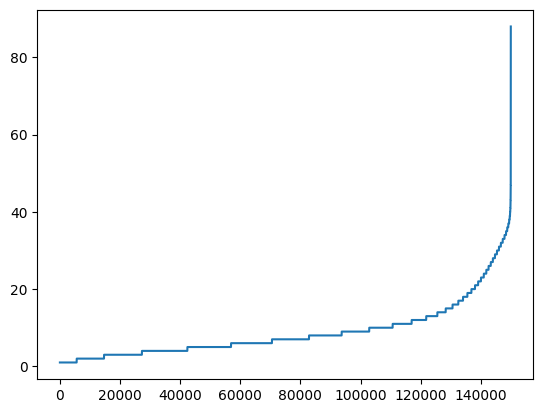

142587


In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

sentence_len = [len(sentence) for sentence in sentences]
sentence_len.sort()
plt.plot(sentence_len)
plt.show()

print(sum([int(l<=25) for l in sentence_len]))

In [35]:
sentences_new = []
for sentence in sentences:
    sentences_new.append([word[:5] for word in sentence][:25])
    
sentences = sentences_new
for i in range(5):
    print(sentences[i])

['아', '더빙', '진짜', '짜증나네요', '목소리']
['흠', '포스터보고', '초딩영화줄', '오버연기조', '가볍지', '않구나']
['너무재밓었']
['교도소', '이야기구먼', '솔직히', '재미는', '없다', '평점', '조정']
['사이몬페그', '익살스런', '연기가', '돋보였던', '영화', '!', '스파이더맨', '늙어보이기', '했던', '커스틴', '던스트가', '너무나도', '이뻐보였다']


In [36]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = 20000)
tokenizer.fit_on_texts(sentences)
train_X = tokenizer.texts_to_sequences(sentences)
train_X = pad_sequences(train_X, padding='post')

print(train_X[:5])

[[   25   884     8  5796  1111     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [  588  5797  6696     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [   71   347    31    35 10468     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [  106  5338     4     2  2169   869   573     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]]


In [37]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(20000, 300, input_length=25),
    tf.keras.layers.LSTM(units=50),
    tf.keras.layers.Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 25, 300)           6000000   
                                                                 
 lstm_2 (LSTM)               (None, 50)                70200     
                                                                 
 dense_4 (Dense)             (None, 2)                 102       
                                                                 
Total params: 6,070,302
Trainable params: 6,070,302
Non-trainable params: 0
_________________________________________________________________


In [38]:
history = model.fit(train_X, train_Y, epochs = 5, batch_size = 128,
                   validation_split=0.2)

Epoch 1/5
938/938 [==============================] - 71s 74ms/step - loss: 0.4334 - accuracy: 0.7836 - val_loss: 0.3869 - val_accuracy: 0.8183
Epoch 2/5
938/938 [==============================] - 81s 86ms/step - loss: 0.3228 - accuracy: 0.8493 - val_loss: 0.3855 - val_accuracy: 0.8190
Epoch 3/5
938/938 [==============================] - 80s 85ms/step - loss: 0.2707 - accuracy: 0.8691 - val_loss: 0.4403 - val_accuracy: 0.8163
Epoch 4/5
938/938 [==============================] - 80s 86ms/step - loss: 0.2276 - accuracy: 0.8889 - val_loss: 0.4894 - val_accuracy: 0.8131
Epoch 5/5
938/938 [==============================] - 80s 85ms/step - loss: 0.1934 - accuracy: 0.9041 - val_loss: 0.5398 - val_accuracy: 0.8070


In [40]:
test_sentence = '재미있을 줄 알았는데 완전 실망했다. 너무 졸리고 돈이 아까웠다.'
test_sentence = test_sentence.split(' ')
test_sentences = []
now_sentence = []
for word in test_sentence:
    now_sentence.append(word)
    test_sentences.append(now_sentence[:])
    
test_X_1 = tokenizer.texts_to_sequences(test_sentences)
test_X_1 = pad_sequences(test_X_1, padding='post', maxlen=25)
prediction = model.predict(test_X_1)
for idx, sentence in enumerate(test_sentences):
    print(sentence)
    print(prediction[idx])

['재미있을']
[0.48401976 0.5159802 ]
['재미있을', '줄']
[0.5213374 0.4786627]
['재미있을', '줄', '알았는데']
[0.5970163  0.40298375]
['재미있을', '줄', '알았는데', '완전']
[0.75267863 0.24732134]
['재미있을', '줄', '알았는데', '완전', '실망했다.']
[0.75267863 0.24732134]
['재미있을', '줄', '알았는데', '완전', '실망했다.', '너무']
[0.8854269  0.11457313]
['재미있을', '줄', '알았는데', '완전', '실망했다.', '너무', '졸리고']
[0.9974567  0.00254329]
['재미있을', '줄', '알았는데', '완전', '실망했다.', '너무', '졸리고', '돈이']
[0.9982174  0.00178262]
['재미있을', '줄', '알았는데', '완전', '실망했다.', '너무', '졸리고', '돈이', '아까웠다.']
[0.9982174  0.00178262]
